# 2 eggs and 100 floors
- All eggs are the same.
- We drop the egg from a particular floor, it breaks or survives. If it survives we can throw the same egg from a higher floor. How many attempts do we need to identify the **max** floor at which the egg doesn't break when thrown down?

## OO Class Design:

In [1]:
class Egg:
    
    def __init__(self, break_floor: int):
        """
        break_floor: an integer determines the floor that such egg will break at.
        """
        self.break_floor = break_floor

class Building:
    
    def __init__(self, 
                 max_floor: int):
        """
        Initialize a floor and the type of egg.
        max_floor: the highest floor number
        egg: the type of egg that will be thrown on different floors of this building. 
        """
        self.floor_range = range(1, max_floor + 1)
        
    def throw_egg(self, 
                  egg: Egg,
                  current_floor: int) -> bool:
        """
        throw an `egg` on the `current_floor` 
        based on egg's break_floor, return:
            True: if the egg breaks
            False: the egg does not break. 
        """
        if current_floor not in self.floor_range:
            print(f'Error: invalid floor {current_floor}')
            return False
        
        # if current_floor is at or higher than the egg's break_floor, then it should break
        return current_floor >= egg.break_floor

## Simulation Helper function (optional)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate(throw_egg_function, max_floor = 100):
    """
    Simulate throwing egg functions for all `egg_break_floor` values
    """
    expected_value = 0
    results = np.zeros(shape=(1,2))
    building = Building(max_floor)
    
    # starting with the egg that break on the first floor
    for egg_break_floor in range(1, max_floor):
        current_egg = Egg(egg_break_floor)
        number_of_trials = throw_egg_function(building, current_egg)
        expected_value += number_of_trials
        results = np.append(results, [[egg_break_floor, number_of_trials]], axis=0)
     
    expected_value = expected_value/(max_floor - 1)
    
    plt.plot(results[:,1], marker='.')
    plt.title(f'Simulation on {throw_egg_function.__name__}, expected number of throws={expected_value:.3f}')
    plt.xlabel('Egg-break floor')
    plt.ylabel('Number of trials')
    plt.show()    

## 1 egg and 100 floors (naive question):

In [3]:
def throw_1_egg(building: Building, egg: Egg) -> int:
    """
    Throw a type of Egg on a building, return the number of throws to determine if the Egg will break. 
    """
    throw_count = 0
    for i_th_floor in building.floor_range:
        throw_count += 1
        if building.throw_egg(egg, i_th_floor):
            break        
    return throw_count

In [4]:
t1 = Building(max_floor=100)
egg = Egg(59)
print(f'Need to throw {throw_1_egg(t1, egg)} times.')

Need to throw 59 times.


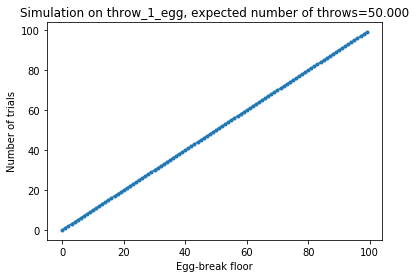

CPU times: user 259 ms, sys: 27.9 ms, total: 287 ms
Wall time: 130 ms


In [5]:
%time simulate(throw_1_egg, 100)

## unlimited eggs and 100 floors (binary search):

In [6]:
def throw_unlimited_eggs(building: Building, 
                         egg: Egg) -> int:
    """
    throw an egg in the middle floor of the building, 
    binary search based on if the egg break (move down) or not (move up).
    """

    b_min = min(list(building.floor_range))
    b_max = max(list(building.floor_range))
    
    current_floor = b_min + (b_max-b_min)/2
    throw_count = 0
    
    binary_search(building, egg, current_floor, 
                  b_min, b_max, 
                  throw_count)
    
    return throw_count

In [7]:
def binary_search(building, egg, current_floor, 
                  b_min, b_max, 
                  throw_count):
    pass

## 2 eggs and 100 floors (easy solution):

In [7]:
def _throw_first_egg(building: Building, egg: Egg) -> (int, int, int):
    """
    Throw the first egg on floor 10th, 20th, 30th, etc
    """
    bucket_size = 10
    throwing_floor = 10
    throw_count = 1
    
    while throwing_floor < max(list(building.floor_range)):
        if building.throw_egg(egg, throwing_floor):
            break
        else:
            throwing_floor += bucket_size
            throw_count += 1
    return throw_count, throwing_floor, bucket_size
            
def _throw_second_egg(building, egg, throw_count, throwing_floor, bucket_size) -> (int, int):
    """
    Now that we know the first egg broke after throwing at; i.e., 20th floor, let's try:
    throw the second egg on floor 11th, 12th, 13th, ..., 19th
    """
    throw_count += 1
    initial_throwing_floor = throwing_floor
    throwing_floor = throwing_floor - bucket_size + 1

    while ((throwing_floor in building.floor_range) 
           and (not building.throw_egg(egg, throwing_floor)) 
           and (throwing_floor != initial_throwing_floor)):
        throwing_floor += 1
        throw_count += 1
        
    return throw_count, throwing_floor

def throw_2_eggs(building: Building, egg: Egg) -> int:
    throw_count, throwing_floor, bucket_size = _throw_first_egg(building, egg)
    throw_count, throwing_floor = _throw_second_egg(building, egg, throw_count, throwing_floor, bucket_size)
    return throw_count

In [8]:
t3 = Building(max_floor=100)
egg=Egg(40)
print(f'Need to throw {throw_2_eggs(t3, egg)} times.')

Need to throw 14 times.


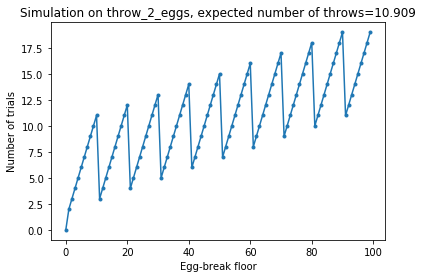

CPU times: user 246 ms, sys: 28.7 ms, total: 275 ms
Wall time: 111 ms


In [9]:
%time simulate(throw_2_eggs, 100)

## 2 eggs and 100 floors (improved solution):
Throw the first egg at floors that are separated by n, n-1, n-2, ... , 1, so that we have:
\begin{equation}
\begin{split}
n + (n-1) + (n-2) + ... + 1 &= 100 \\
\frac{(n+1)*n}{2} &= 100 \\
n &= 14
\end{split}
\end{equation}

In [10]:
import math

def _calculate_n(building: Building):
    """
    m = max(list(floor.floor_range))
    (n+1)*n/2 = m
    n = (sqrt(1+8m) - 1)/2
    """
    m = max(list(building.floor_range))
    result = (math.sqrt(1+8*m) - 1)/2
    return math.ceil(result)

def _throw_first_egg_2(building: Building, egg: Egg) -> (int, int):
    """
    Throw the first egg on floor 10th, 20th, 30th, etc
    """
    bucket_size = _calculate_n(building)
    throwing_floor = bucket_size
    throw_count = 1
    
    while throwing_floor < max(list(building.floor_range)):
        if building.throw_egg(egg, throwing_floor):
            break
        else:
            bucket_size -= 1
            throwing_floor += bucket_size
            throw_count += 1
    return throw_count, throwing_floor, bucket_size

def throw_2_eggs_2(building: Building, egg: Egg) -> int:
    throw_count, throwing_floor, bucket_size = _throw_first_egg_2(building, egg)
    throw_count, throwing_floor = _throw_second_egg(building, egg, throw_count, throwing_floor, bucket_size)
    return throw_count

In [11]:
egg = Egg(2)
t4 = Building(max_floor=100)
throw_2_eggs_2(t4, egg)

3

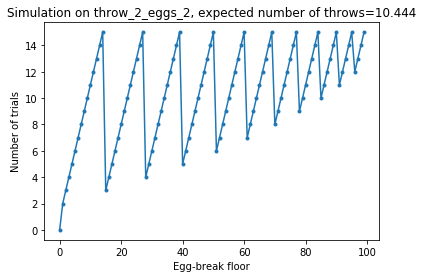

CPU times: user 244 ms, sys: 24.7 ms, total: 268 ms
Wall time: 108 ms


In [12]:
%time simulate(throw_2_eggs_2, 100)

## Generalization: N eggs and T floors (Dynamic Programming):

We want to know how many times of throws are needed at least, $M(T, N)$

| T / N | 1 | 2 | 3 | 4 |
|------------------------|---|---|---|---|
| 1                      | 1 | 1 | 1 | 1 |
| 2                      | 2 | _ | _ | _ |
| 3                      | 3 | _ | _ | _ |


Pick a floor $k$ to throw the first egg, then we have:
$$M_k(T, N) = max\big \{M(k, N-1), M(T-k, N) \big \} + 1$$
, where $M(k, N-1)$ means the first throw at floor $k$ results a broken egg, and $M(N-k, N)$ means the first throws does not have the egg broken from floor $k$. The value $M(k, N-1)$ and $M(N-k, N)$ both mean numbers of throws needed afterwords. 

The $+1$ counts towards the current throw at floor $k$. 

Thus, for a given building with T floors, we have:
$$M(T, N) = min \big \{ M_1(T, N), M_2(T, N), M_3(T, N), ..., M_T(T, N) \big \}$$
